# 概率质量函数
- 概率质量函数PMF:probability mass function
- 概率probability 是频数的分数表示，样本量为n。
- 正态化normalization:将频数除以n。

## 绘制PMF

In [7]:
%matplotlib inline
from __future__ import print_function, division

from collections import defaultdict
import numpy as np
import pandas
import sys
import nsfg
import thinkstats2
import thinkplot

In [8]:
def MakeFrames():
    """Reads pregnancy data and partitions first babies and others.

    returns: DataFrames (all live births, first babies, others)
    """
    preg = nsfg.ReadFemPreg()

    live = preg[preg.outcome == 1]
    firsts = live[live.birthord == 1]
    others = live[live.birthord != 1]

    assert len(live) == 9148
    assert len(firsts) == 4413
    assert len(others) == 4735

    return live, firsts, others
live, firsts, others = MakeFrames()

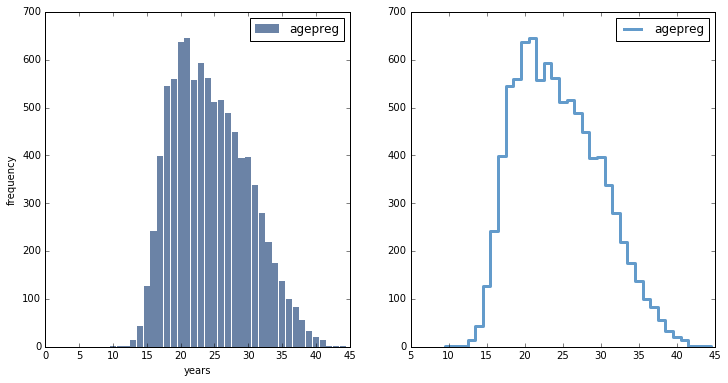

In [9]:
hist = thinkstats2.Hist(np.floor(live.agepreg), label='agepreg')
thinkplot.PrePlot(2, cols=2)

thinkplot.SubPlot(1)
thinkplot.Hist(hist)
thinkplot.Config(xlabel='years',
                ylabel='frequency',
                axis=[0, 45, 0, 700])

thinkplot.SubPlot(2)
thinkplot.Pmf(hist)

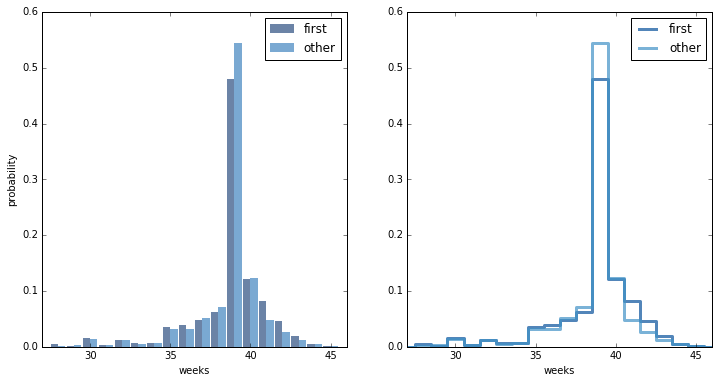

In [10]:
first_pmf = thinkstats2.Pmf(firsts.prglngth, label='first')
other_pmf = thinkstats2.Pmf(others.prglngth, label='other')
width = 0.45

thinkplot.PrePlot(2, cols=2)
thinkplot.Hist(first_pmf, align='right', width=width)
thinkplot.Hist(other_pmf, align='left', width=width)
thinkplot.Config(xlabel='weeks',
                ylabel='probability',
                axis=[27, 46, 0, 0.6])

thinkplot.PrePlot(2)
thinkplot.SubPlot(2)
thinkplot.Pmfs([first_pmf, other_pmf])
thinkplot.Config(xlabel='weeks',
                axis=[27, 46, 0, 0.6])

第一胎和其他胎妊娠期PMF的条形图和阶梯函数：第一胎似乎较少会准时出生（39周），而更可能会较晚出生（41周和42周）。

## PMF差异

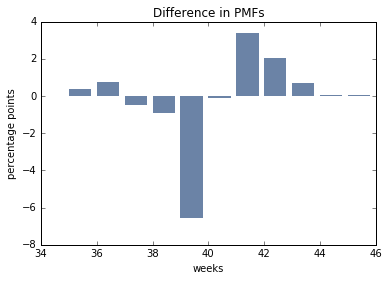

In [12]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = first_pmf.Prob(week)
    p2 = other_pmf.Prob(week)
    diff = 100 * (p1 - p2)
    diffs.append(diff)

thinkplot.Bar(weeks, diffs)
thinkplot.Config(title='Difference in PMFs',
                xlabel='weeks',
                ylabel='percentage points',
                legend=False)

第一胎似乎较少会准时出生（39周），而更可能会较晚出生（41周和42周）。

## 课堂规模悖论
在美国大学里，学生与教师的比率约为10：1。但是学生们经常发现自己的课上平均数大于10。
- 学生每学期修4到5门课，但是教授经常只教1门或2门课。 //学生被放大4-5倍，教授被放大1-2倍
- 上小课的学生很少，但上大课的学生人数非常多。

In [13]:
def BiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to value.

    If pmf is the distribution of true values, the result is the
    distribution that would be seen if values are oversampled in
    proportion to their values; for example, if you ask students
    how big their classes are, large classes are oversampled in
    proportion to their size.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf


def UnbiasPmf(pmf, label=''):
    """Returns the Pmf with oversampling proportional to 1/value.

    Args:
      pmf: Pmf object.
      label: string label for the new Pmf.

     Returns:
       Pmf object
    """
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, 1.0/x)
        
    new_pmf.Normalize()
    return new_pmf

actual mean 23.6923076923
actual var 128.674556213
observed mean 29.1233766234
observed var 109.225037949
unbiased mean 23.6923076923
unbiased var 128.674556213


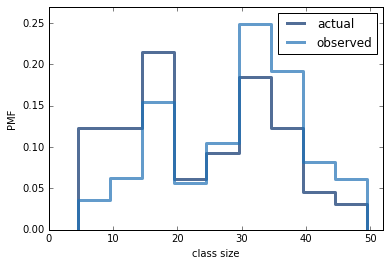

In [14]:
# start with the actual distribution of class sizes from the book
d = { 7: 8, 12: 8, 17: 14, 22: 4, 27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

# form the pmf
pmf = thinkstats2.Pmf(d, label='actual')
print('actual mean', pmf.Mean())
print('actual var', pmf.Var())
    
# compute the biased pmf
biased_pmf = BiasPmf(pmf, label='observed')
print('observed mean', biased_pmf.Mean())
print('observed var', biased_pmf.Var())

# unbias the biased pmf
unbiased_pmf = UnbiasPmf(biased_pmf, label='unbiased')
print('unbiased mean', unbiased_pmf.Mean())
print('unbiased var', unbiased_pmf.Var())

# plot the Pmfs
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='class size',
                ylabel='PMF',
                axis=[0, 52, 0, 0.27])

深色为实际分布，浅色为观察得到的分布（偏倚分布）。在偏倚分布中，小课更少，大课更多。